In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/iriscsv/Iris.csv


In [2]:
#uploaded the dataset
df=pd.read_csv('/kaggle/input/iriscsv/Iris.csv')


In [3]:
#saw the data 
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#infering about the niche details of the data distruibution in the dataset
df.info()
#all independent features are numerical type
#target variable is of categorical type
#therefore we need to apply label encoding on the target variable since machine learning algorithms do not work efficently on the categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#no null values present in the data

In [72]:
#importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#performing univariate EDA

/tmp/ipykernel_36/789205228.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalLengthCm'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SepalLengthCm', ylabel='Density'>

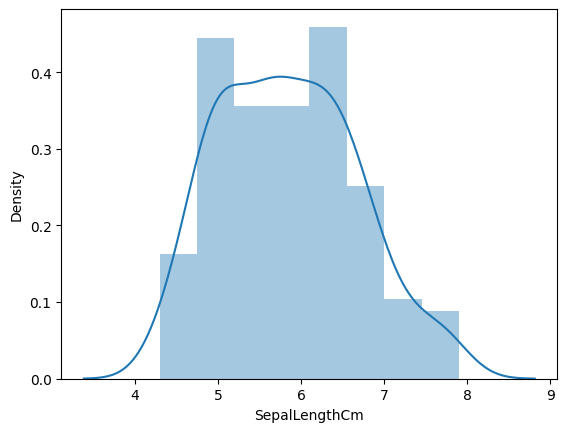

In [13]:
sns.distplot(df['SepalLengthCm'])
#the data is normally distributed

<Axes: >

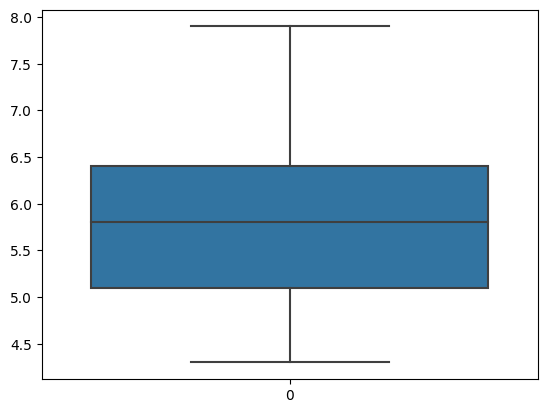

In [14]:
sns.boxplot(df['SepalLengthCm'])

In [16]:
#average is around 5.8 and no outliers are present in the data
df['SepalLengthCm'].mean()

5.843333333333334

In [17]:
df['SepalLengthCm'].max()
#max value is 7.9

7.9

In [19]:
df['SepalLengthCm'].min()
#minimum value is 4.3

4.3

In [21]:
df['SepalLengthCm'].duplicated()
#to check duplicate values on the feature column
#and duplicate values are present

115

In [23]:
#need to drop duplicate values since it can make the model ruuning timing more and lead to data imbalance aswell
df['SepalLengthCm'].drop_duplicates(inplace=True)

In [24]:
df.shape

(150, 6)

/tmp/ipykernel_36/3402425195.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SepalWidthCm'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SepalWidthCm', ylabel='Density'>

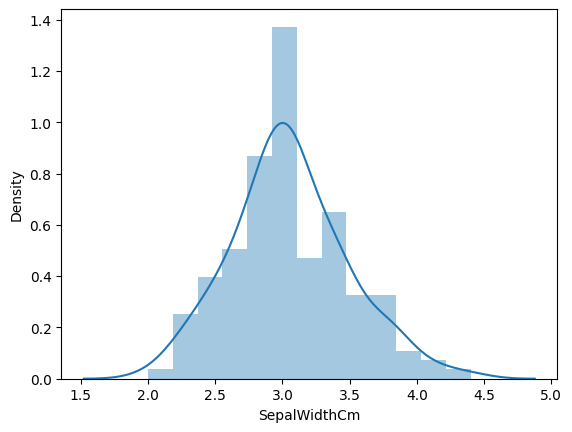

In [25]:
sns.distplot(df['SepalWidthCm'])
#it is also normally distributed

<Axes: >

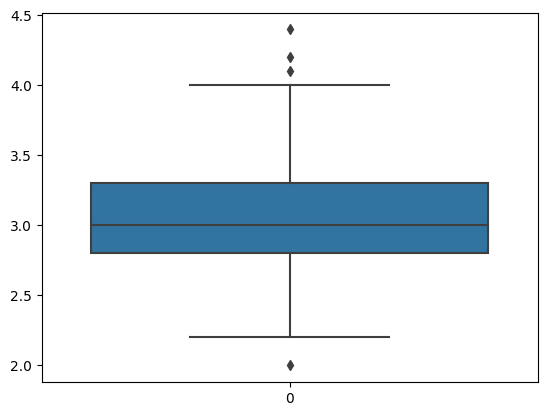

In [26]:
sns.boxplot(df['SepalWidthCm'])
#few outliers present in the data

In [34]:
df['SepalWidthCm'].drop_duplicates(inplace=True)
#Few outliers present in the data 
df.shape

(150, 6)

/tmp/ipykernel_36/2781944064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalLengthCm'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PetalLengthCm', ylabel='Density'>

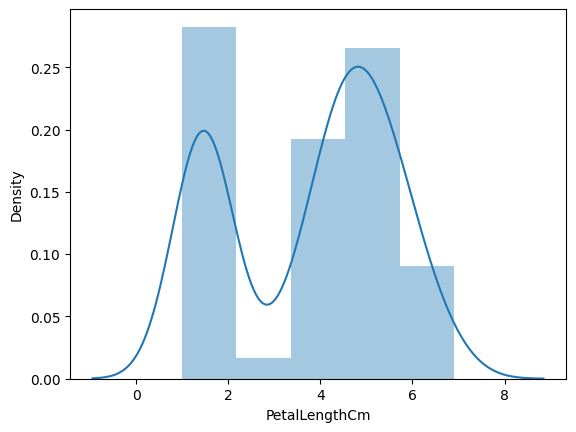

In [35]:
sns.distplot(df['PetalLengthCm'])
#data is bi modal

-0.27446425247378287

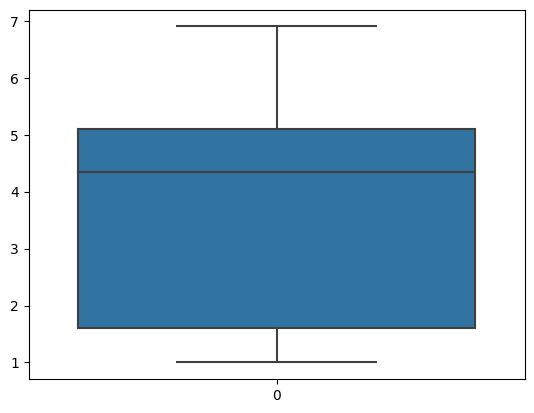

In [38]:
sns.boxplot(df['PetalLengthCm'])
df['PetalLengthCm'].skew()
#data is also skewed

In [41]:
df['PetalLengthCm'].drop_duplicates(inplace=True)
#drooping null values

/tmp/ipykernel_36/2781944064.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PetalLengthCm'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PetalLengthCm', ylabel='Density'>

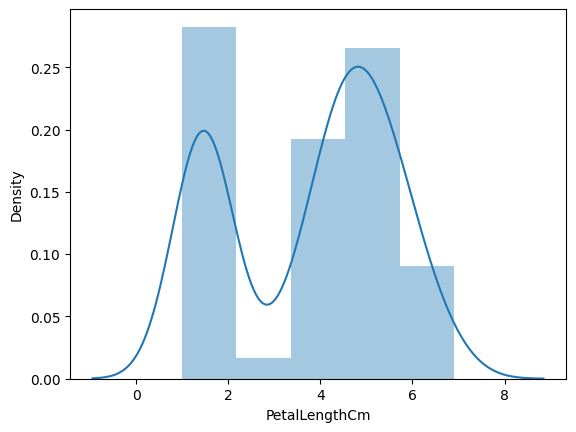

In [43]:
sns.distplot(df['PetalLengthCm'])
# the data is bi model

<Axes: >

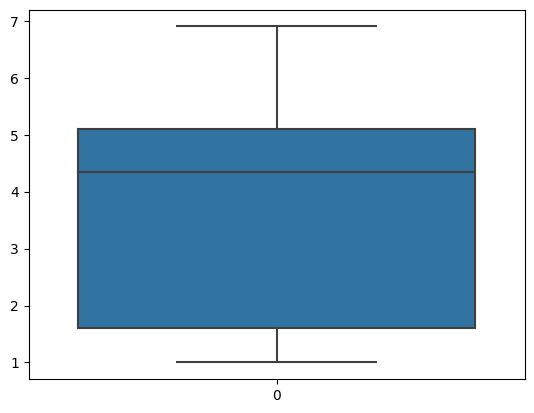

In [44]:
sns.boxplot(df['PetalLengthCm'])
#data has no outliers

In [46]:
df['PetalLengthCm'].duplicated()
#data has duplicate values

0      False
1       True
2      False
3      False
4       True
       ...  
145    False
146     True
147     True
148     True
149     True
Name: PetalLengthCm, Length: 150, dtype: bool

In [ ]:
#biavriate analysis

In [60]:
X=df.iloc[:,1:5]
y=df.iloc[:,-1]
#distributing the data in train,test to check the performancxe of the model further
#20% data will go to test and 80% to train

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
lw=LabelEncoder()
#import labelencoding to convert categorical target variable into the numerical

In [62]:
lw.fit(y_train)
lw.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

<Axes: >

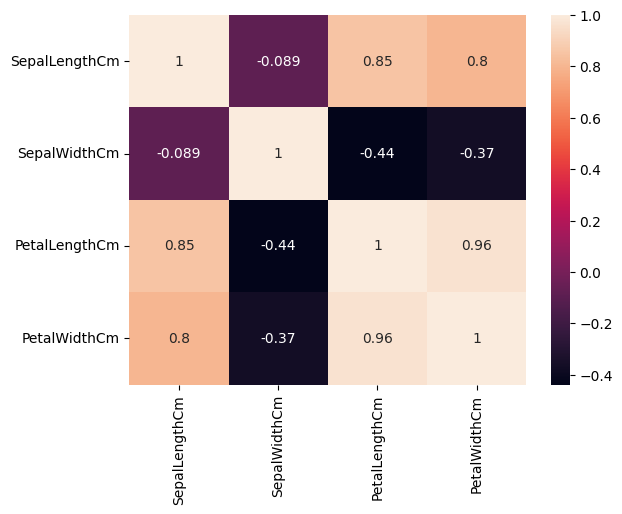

In [66]:
sns.heatmap(X_train.corr(),annot=True)
#there is strong corelation between petallength and sepalwidth and petallength  amd betweeen petallength and petalwidth and between petallength and sepallength,petalwidth and sepallength

In [69]:
#using logitic regression since it is classification
lr=LogisticRegression()

In [70]:
lr.fit(X_train,y_train)
#training the model

LogisticRegression()

In [73]:
y_pred=lr.predict(X_test)
#predicting the values

In [74]:
accuracy_score(y_pred,y_test)
#the performance of the  model is 96%

0.9666666666666667